In [ ]:
import pandas as pd
import torch
from torch.utils.data import DataLoader, TensorDataset
import pytorch_lightning as pl
import tensorflow as tf
from keras.metrics import Precision, Recall
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("datasets/sign_language_mnist/sign_mnist_train.csv")

# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Normalize the pixel values to be between 0 and 1
x_train, x_val, x_test = x_train / 255.0, x_val / 255.0, x_test / 255.0

# Print the shapes of the datasets
print("Shape of training set:", x_train.shape)
print("Shape of validation set:", x_val.shape)
print("Shape of test set:", x_test.shape)


In [ ]:
df = pd.read_csv("datasets/sign_language_mnist/sign_mnist_train.csv")
df2 = df.loc[0]

In [ ]:
labels = to_categorical(df['label'])
train_df = df.drop(['label'], axis=1)
arr = train_df.to_numpy()
arr = arr.reshape((-1,28, 28,1))
arr.shape

In [ ]:
image_array = arr.reshape((1,28, 28))

# Display the image
plt.imshow(image_array.reshape(28, 28,1), cmap='gray')  # Show the image in grayscale
plt.axis('off')
plt.show()

In [ ]:
model = Sequential(name="andha_ai")
model.add(Conv2D(16, (2, 2), activation='relu', input_shape=(28, 28,1)))  # Changed (3, 3) to (2, 2)
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (2, 2), activation='relu'))  # Changed (3, 3) to (2, 2) and channels to 32
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (2, 2), activation='relu'))  # Changed (3, 3) to (2, 2) and channels to 64
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(25, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', Precision(name='precision'), Recall(name='recall')])


In [ ]:
model.summary()
history = model.fit(arr,labels, epochs=10, validation_split=0.2)

In [ ]:
df_test = pd.read_csv("datasets/sign_language_mnist/sign_mnist_test/sign_mnist_test.csv")

In [ ]:
test_clean = df_test.drop(['label'], axis=1)
arr_test = test_clean.to_numpy()
arr_test = arr_test.reshape((-1,28, 28,1))
arr_test.shape

In [53]:
predicted_labels = []
mini_arr = arr_test
for i in mini_arr:
    image_array = i.reshape((1,28, 28))
    # Display the image
    # plt.imshow(image_array.reshape(28, 28,1), cmap='gray')  # Show the image in grayscale
    # plt.axis('off')
    # plt.show()
    val = model.predict(image_array).argmax()
    predicted_labels.append(val)

1/1 [==============================] - 0s 27ms/step


In [56]:
model.save("models/mnist_sign_language.h5")

Shape of Confusion Matrix: (24, 24)


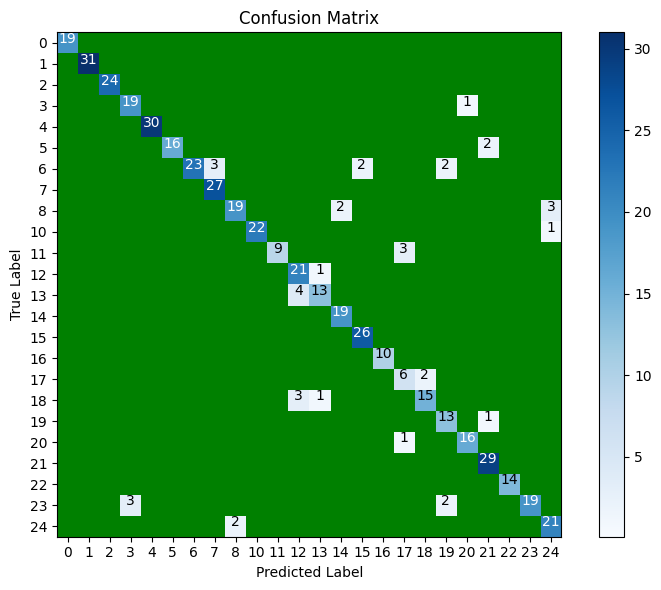

In [54]:
tst = df_test['label']
cm = confusion_matrix(predicted_labels, tst)

# Identify misclassifications with counts greater than 1
misclassified_indices = np.where(cm > 0)

# Display the confusion matrix and its shape
# print("Confusion Matrix:")
# print(cm)
print("Shape of Confusion Matrix:", cm.shape)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))

# Define colors for the plot
cmap = plt.cm.Blues
# Set the color for misclassifications
cmap.set_under('green')

plt.imshow(cm, interpolation='nearest', cmap=cmap, vmin=0.1)
plt.title('Confusion Matrix')
plt.colorbar()

# Adding axis labels 
classes = np.unique(tst)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Adding annotations for misclassifications with counts > 1
thresh = cm.max() / 2.0
for i, j in zip(*misclassified_indices):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()